In [76]:
import numpy as np
import pandas as pd
import xarray as xr
import random
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
gt = np.load('groundtruth_10.npy')
pr = np.load('prediction_10.npy')
ds = xr.open_dataset('compress.isosph.CESM2-FV2.historical.r1i1p1f1.Output.nc')

In [82]:
lon_list = ds.lon.data
lat_list = ds.lat.data

In [83]:
#Randomly Generate a row value for visualization
t = random.randint(1, len(pr))

Text(0.5, 1.0, 'Prediction: Precipitation')

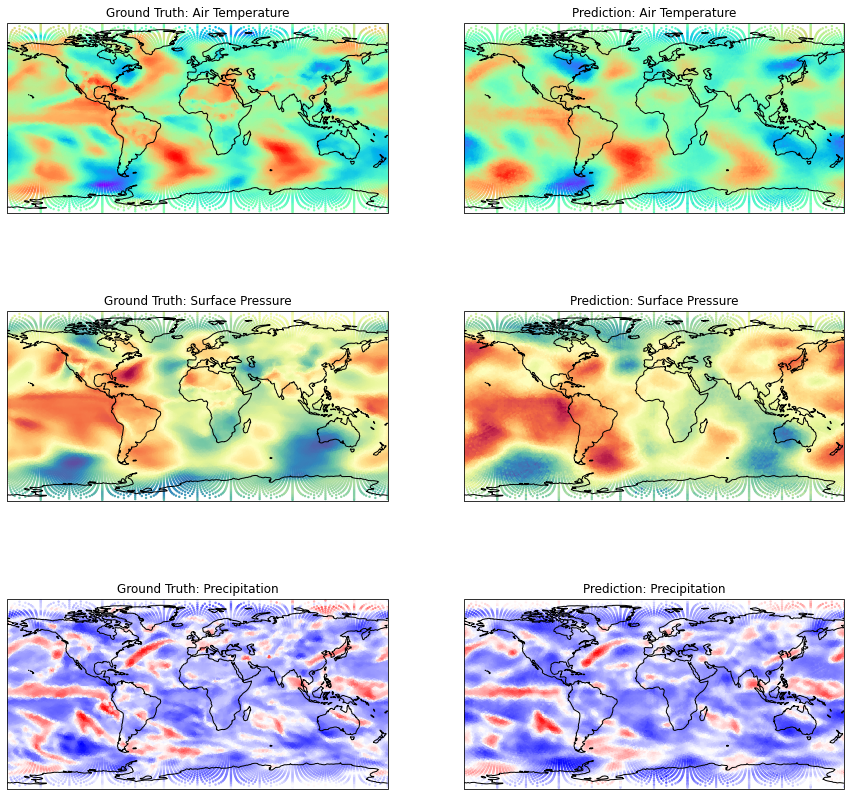

In [84]:
# Define the figure and each axis for the 3 rows and 2 columns
fig, axs = plt.subplots(nrows=3,ncols=2,
                        subplot_kw={'projection': crs.PlateCarree()},
                        figsize=(15,15))

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

## First row shows Air Temperature
tas_gt = axs[0].scatter(x=lon_list, y=lat_list, c=gt[t,:,0], s=2,
                          transform = crs.PlateCarree(),
                          cmap='rainbow')
axs[0].coastlines()
axs[0].set_title("Ground Truth: Air Temperature")

tas_pr = axs[1].scatter(x=lon_list, y=lat_list, c=pr[t,:,0], s=2,
                          transform = crs.PlateCarree(),
                          cmap='rainbow')
axs[1].coastlines()
axs[1].set_title("Prediction: Air Temperature")


## Second row shows Surface Pressure
psl_gt = axs[2].scatter(x=lon_list, y=lat_list, c=gt[t,:,1], s=2,
                          transform = crs.PlateCarree(),
                          cmap='Spectral')
axs[2].coastlines()
axs[2].set_title("Ground Truth: Surface Pressure")

psl_pr = axs[3].scatter(x=lon_list, y=lat_list, c=pr[t,:,1], s=2,
                          transform = crs.PlateCarree(),
                          cmap='Spectral')
axs[3].coastlines()
axs[3].set_title("Prediction: Surface Pressure")

## Third row shows Precipitation
pr_gt = axs[4].scatter(x=lon_list, y=lat_list, c=gt[t,:,2], s=2,
                          transform = crs.PlateCarree(),
                          cmap='bwr')
axs[4].coastlines()
axs[4].set_title("Ground Truth: Precipitation")

pr_pr = axs[5].scatter(x=lon_list, y=lat_list, c=pr[t,:,2], s=2,
                          transform = crs.PlateCarree(),
                          cmap='bwr')
axs[5].coastlines()
axs[5].set_title("Prediction: Precipitation")